In [2]:
import json
import string
import os
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional,Input, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

    

In [3]:
evaluating = {
    'best':1,
    'bad':0,
    'normal':0
}

# data 구성

In [32]:

ann_target = 'C:/Users/haeinlee/Desktop/train_data/'
data_flag = 0

for (root_path, dir, files) in os.walk(ann_target):
    for d in dir:
        # 각 디렉토리에서 8개의 파일을 가져와야 함
        for (path, dir, files) in os.walk(root_path+'/'+d+'/'):
            print(path)
            j_index = 0
            directory_data=[]
            for file in files:
                try:
                    with open(path+file, "r", encoding='UTF8') as json_file:
                        nj_data = json.load(json_file)
                except:
                    pass
                try:
                    tmp = np.array(sum(nj_data['keypoints'],[]))
                    tmp[0::2] = tmp[0::2]/nj_data['resolution'][0]
                    tmp[1::2] = tmp[1::2]/nj_data['resolution'][1]
                    directory_data.append(tmp)
                    j_index+=1
                except:
                    print("json Error: "+file)

            if len(directory_data)<8:
                print("failed : "+path)
                
            else:
                if data_flag==0:
                    x=np.array([directory_data])
                    y=np.array([evaluating[nj_data['evaluation']]])
                    data_flag=1
                    print(x.shape)
                else:
                    x= np.concatenate((x, np.array([directory_data])),axis=0)
                    y= np.concatenate((y, [evaluating[nj_data['evaluation']]]))

C:/Users/haeinlee/Desktop/train_data//1/
(1, 8, 24)
C:/Users/haeinlee/Desktop/train_data//10/
C:/Users/haeinlee/Desktop/train_data//11/
C:/Users/haeinlee/Desktop/train_data//12/
C:/Users/haeinlee/Desktop/train_data//13/
C:/Users/haeinlee/Desktop/train_data//14/
C:/Users/haeinlee/Desktop/train_data//15/
C:/Users/haeinlee/Desktop/train_data//16/
C:/Users/haeinlee/Desktop/train_data//17/
C:/Users/haeinlee/Desktop/train_data//18/
C:/Users/haeinlee/Desktop/train_data//19/
C:/Users/haeinlee/Desktop/train_data//2/
failed : C:/Users/haeinlee/Desktop/train_data//2/
C:/Users/haeinlee/Desktop/train_data//20/
C:/Users/haeinlee/Desktop/train_data//21/
C:/Users/haeinlee/Desktop/train_data//22/
C:/Users/haeinlee/Desktop/train_data//23/
C:/Users/haeinlee/Desktop/train_data//24/
C:/Users/haeinlee/Desktop/train_data//25/
C:/Users/haeinlee/Desktop/train_data//26/
C:/Users/haeinlee/Desktop/train_data//27/
C:/Users/haeinlee/Desktop/train_data//28/
C:/Users/haeinlee/Desktop/train_data//29/
C:/Users/haeinlee

C:/Users/haeinlee/Desktop/train_data//last_public (41)/
C:/Users/haeinlee/Desktop/train_data//last_public (42)/
C:/Users/haeinlee/Desktop/train_data//last_public (43)/
C:/Users/haeinlee/Desktop/train_data//last_public (44)/
C:/Users/haeinlee/Desktop/train_data//last_public (45)/
C:/Users/haeinlee/Desktop/train_data//last_public (46)/
C:/Users/haeinlee/Desktop/train_data//last_public (47)/
C:/Users/haeinlee/Desktop/train_data//last_public (48)/
C:/Users/haeinlee/Desktop/train_data//last_public (49)/
C:/Users/haeinlee/Desktop/train_data//last_public (5)/
C:/Users/haeinlee/Desktop/train_data//last_public (50)/
C:/Users/haeinlee/Desktop/train_data//last_public (6)/
C:/Users/haeinlee/Desktop/train_data//last_public (7)/
C:/Users/haeinlee/Desktop/train_data//last_public (8)/
C:/Users/haeinlee/Desktop/train_data//last_public (9)/
C:/Users/haeinlee/Desktop/train_data//pj/
C:/Users/haeinlee/Desktop/train_data//pj (10)/
C:/Users/haeinlee/Desktop/train_data//pj (11)/
C:/Users/haeinlee/Desktop/tra

In [5]:
# 데이터를 랜덤하게 섞고 트레인, 테스트 셋을 나눠줍시다...
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=42)

In [40]:
np.unique(y,return_counts=True) 

(array([0, 1]), array([126, 160], dtype=int64))

#LSTM 모델

In [8]:
 
 
model = Sequential()
model.add(LSTM(64, return_sequences=True,activation = 'sigmoid', name='LSTM0',input_shape=(8, 24)))
model.add(LSTM(32, return_sequences=True, name='LSTM1'))
model.add(LSTM(16, return_sequences=True, name='LSTM2'))
model.add(Flatten())
model.add(Dense(8))

model.add(Dense(1,activation = 'sigmoid'))
 
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
 
 
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='binary_crossentropy', patience=10, mode='auto',)
# mode=auto loss면 최저값이10번정도 반복되면 정지, acc면 최고값이 10번정도 반복되면 정지
# mode=min, mode=max
# history = model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=2, callbacks=[early_stopping])

history = model.fit(x_train, y_train, epochs=140, batch_size=4, verbose=1,validation_split=0.3)


Epoch 1/140
50/50 [==============================] - 4s 18ms/step - loss: 0.2508 - accuracy: 0.5455 - val_loss: 0.2480 - val_accuracy: 0.5349
Epoch 2/140
50/50 [==============================] - 0s 7ms/step - loss: 0.2476 - accuracy: 0.5657 - val_loss: 0.2478 - val_accuracy: 0.5349
Epoch 3/140
50/50 [==============================] - 0s 7ms/step - loss: 0.2458 - accuracy: 0.5657 - val_loss: 0.2470 - val_accuracy: 0.5349
Epoch 4/140
50/50 [==============================] - 0s 7ms/step - loss: 0.2458 - accuracy: 0.5657 - val_loss: 0.2469 - val_accuracy: 0.5349
Epoch 5/140
50/50 [==============================] - 0s 7ms/step - loss: 0.2401 - accuracy: 0.5758 - val_loss: 0.2347 - val_accuracy: 0.7326
Epoch 6/140
50/50 [==============================] - 0s 7ms/step - loss: 0.2413 - accuracy: 0.5758 - val_loss: 0.2320 - val_accuracy: 0.7907
Epoch 7/140
50/50 [==============================] - 0s 7ms/step - loss: 0.2120 - accuracy: 0.7121 - val_loss: 0.2100 - val_accuracy: 0.6860
Epoch 8/140


Epoch 59/140
50/50 [==============================] - 0s 10ms/step - loss: 0.1498 - accuracy: 0.7677 - val_loss: 0.1540 - val_accuracy: 0.7791
Epoch 60/140
50/50 [==============================] - 1s 13ms/step - loss: 0.1644 - accuracy: 0.7677 - val_loss: 0.1519 - val_accuracy: 0.7907
Epoch 61/140
50/50 [==============================] - 0s 10ms/step - loss: 0.1524 - accuracy: 0.7929 - val_loss: 0.1642 - val_accuracy: 0.7558
Epoch 62/140
50/50 [==============================] - 0s 8ms/step - loss: 0.1536 - accuracy: 0.7929 - val_loss: 0.1515 - val_accuracy: 0.7674
Epoch 63/140
50/50 [==============================] - 0s 8ms/step - loss: 0.1469 - accuracy: 0.7879 - val_loss: 0.1588 - val_accuracy: 0.7326
Epoch 64/140
50/50 [==============================] - 0s 10ms/step - loss: 0.1604 - accuracy: 0.7626 - val_loss: 0.1484 - val_accuracy: 0.7791
Epoch 65/140
50/50 [==============================] - 0s 9ms/step - loss: 0.1579 - accuracy: 0.7677 - val_loss: 0.1637 - val_accuracy: 0.7791
Ep

테스트 데이터셋 떼어놓은거 검증

# 마지막에 추가한 데이터셋까지 넣어서 early stop

In [ ]:
model

In [9]:
results = model.evaluate(x_test, y_test, batch_size=10)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.8750
test loss, test acc: [0.1083604171872139, 0.875]


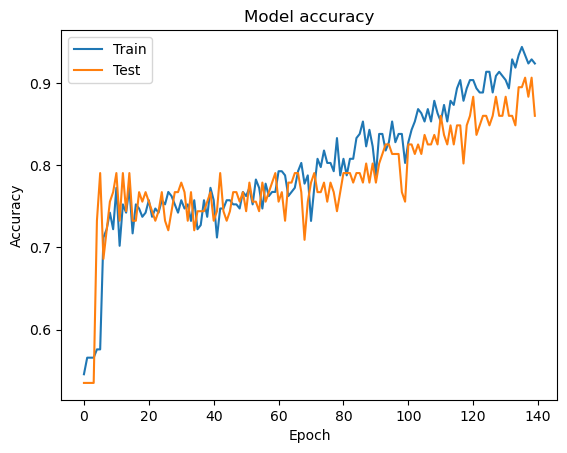

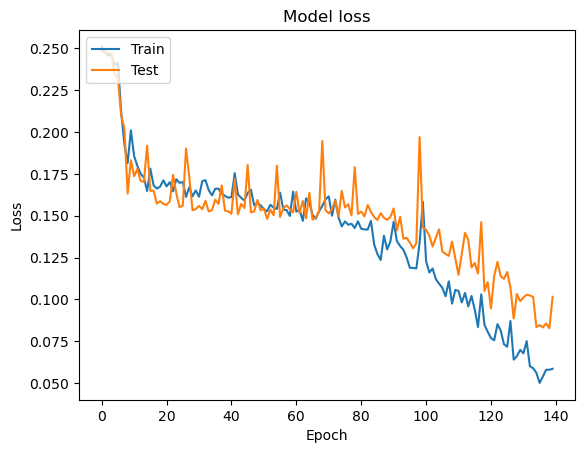

In [10]:
draw_result(history)

In [12]:
len(x_test)

72

# Early Stop을 해보자

In [13]:
 
 
model9 = Sequential()
model9.add(LSTM(64, return_sequences=True,activation = 'sigmoid', name='LSTM0',input_shape=(8, 24)))
model9.add(LSTM(32, return_sequences=True, name='LSTM1'))
model9.add(LSTM(16, return_sequences=True, name='LSTM2'))
model9.add(Flatten())
model9.add(Dense(8))

model9.add(Dense(1,activation = 'sigmoid'))
 
model9.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
 
 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=30, mode='auto',)
# mode=auto loss면 최저값이10번정도 반복되면 정지, acc면 최고값이 10번정도 반복되면 정지
# mode=min, mode=max
# history = model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=2, callbacks=[early_stopping])

history = model9.fit(x_train, y_train, epochs=500, batch_size=4, verbose=1,validation_split=0.3, callbacks=[early_stopping])


Epoch 1/500
50/50 [==============================] - 4s 18ms/step - loss: 0.2574 - accuracy: 0.5051 - val_loss: 0.2486 - val_accuracy: 0.5349
Epoch 2/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2475 - accuracy: 0.5657 - val_loss: 0.2478 - val_accuracy: 0.5349
Epoch 3/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 0.5657 - val_loss: 0.2471 - val_accuracy: 0.5349
Epoch 4/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2457 - accuracy: 0.5657 - val_loss: 0.2466 - val_accuracy: 0.5349
Epoch 5/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2453 - accuracy: 0.5657 - val_loss: 0.2445 - val_accuracy: 0.5349
Epoch 6/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2443 - accuracy: 0.5101 - val_loss: 0.2406 - val_accuracy: 0.5349
Epoch 7/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2318 - accuracy: 0.5960 - val_loss: 0.2377 - val_accuracy: 0.5465
Epoch 8/500


Epoch 59/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1507 - accuracy: 0.7727 - val_loss: 0.1562 - val_accuracy: 0.7558
Epoch 60/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1494 - accuracy: 0.7980 - val_loss: 0.1569 - val_accuracy: 0.7791
Epoch 61/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1551 - accuracy: 0.8030 - val_loss: 0.1566 - val_accuracy: 0.7791
Epoch 62/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1494 - accuracy: 0.8030 - val_loss: 0.1560 - val_accuracy: 0.7326
Epoch 63/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1428 - accuracy: 0.7980 - val_loss: 0.1631 - val_accuracy: 0.7558
Epoch 64/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1487 - accuracy: 0.8131 - val_loss: 0.1643 - val_accuracy: 0.7558
Epoch 65/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1470 - accuracy: 0.8182 - val_loss: 0.1681 - val_accuracy: 0.7558
Epoch 

50/50 [==============================] - 0s 7ms/step - loss: 0.0480 - accuracy: 0.9293 - val_loss: 0.0773 - val_accuracy: 0.8953
Epoch 174/500
50/50 [==============================] - 0s 6ms/step - loss: 0.0384 - accuracy: 0.9545 - val_loss: 0.0808 - val_accuracy: 0.9070
Epoch 175/500
50/50 [==============================] - 0s 6ms/step - loss: 0.0407 - accuracy: 0.9444 - val_loss: 0.0754 - val_accuracy: 0.8953
Epoch 176/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0406 - accuracy: 0.9444 - val_loss: 0.0752 - val_accuracy: 0.9070
Epoch 177/500
50/50 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.9545 - val_loss: 0.1002 - val_accuracy: 0.8605
Epoch 178/500
50/50 [==============================] - 0s 6ms/step - loss: 0.0573 - accuracy: 0.9242 - val_loss: 0.0937 - val_accuracy: 0.8837
Epoch 179/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0408 - accuracy: 0.9495 - val_loss: 0.0670 - val_accuracy: 0.9302
Epoch 180/500

In [14]:
results = model9.evaluate(x_test, y_test, batch_size=10)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9167
test loss, test acc: [0.0813121348619461, 0.9166666865348816]


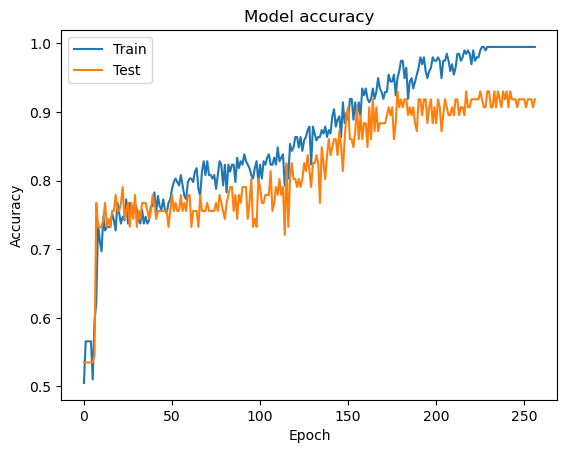

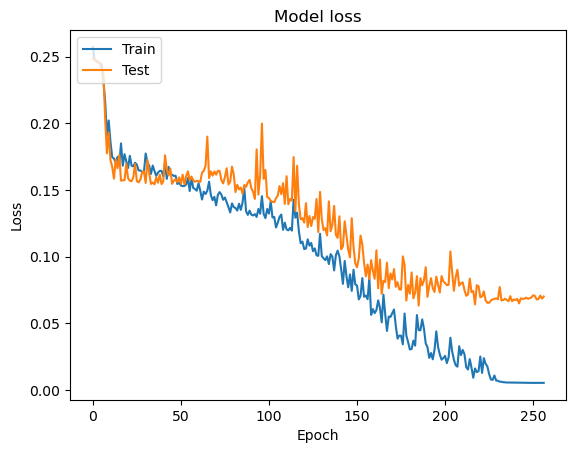

In [15]:
draw_result(history)

# model 9가 6월 19일 오전기준 최종 

In [19]:
 
 
model9 = Sequential()
model9.add(LSTM(64, return_sequences=True,activation = 'sigmoid', name='LSTM0',input_shape=(8, 24)))
model9.add(LSTM(32, return_sequences=True, name='LSTM1'))
model9.add(LSTM(16, return_sequences=True, name='LSTM2'))
model9.add(Flatten())
model9.add(Dense(8))

model9.add(Dense(1,activation = 'sigmoid'))
 
model9.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
 
 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=20, mode='auto',)
# mode=auto loss면 최저값이10번정도 반복되면 정지, acc면 최고값이 10번정도 반복되면 정지
# mode=min, mode=max
# history = model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=2, callbacks=[early_stopping])

history = model9.fit(x_train, y_train, epochs=500, batch_size=4, verbose=1,validation_split=0.3, callbacks=[early_stopping])


Epoch 1/500
50/50 [==============================] - 4s 18ms/step - loss: 0.2515 - accuracy: 0.5455 - val_loss: 0.2478 - val_accuracy: 0.5349
Epoch 2/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2478 - accuracy: 0.5657 - val_loss: 0.2468 - val_accuracy: 0.5349
Epoch 3/500
50/50 [==============================] - 1s 17ms/step - loss: 0.2460 - accuracy: 0.5657 - val_loss: 0.2456 - val_accuracy: 0.5349
Epoch 4/500
50/50 [==============================] - 0s 8ms/step - loss: 0.2438 - accuracy: 0.5657 - val_loss: 0.2372 - val_accuracy: 0.5349
Epoch 5/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2369 - accuracy: 0.5960 - val_loss: 0.2215 - val_accuracy: 0.6512
Epoch 6/500
50/50 [==============================] - 0s 8ms/step - loss: 0.2362 - accuracy: 0.5758 - val_loss: 0.2221 - val_accuracy: 0.5698
Epoch 7/500
50/50 [==============================] - 0s 8ms/step - loss: 0.2222 - accuracy: 0.6818 - val_loss: 0.2034 - val_accuracy: 0.7791
Epoch 8/500

Epoch 59/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1536 - accuracy: 0.7929 - val_loss: 0.1591 - val_accuracy: 0.7558
Epoch 60/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1550 - accuracy: 0.7929 - val_loss: 0.1534 - val_accuracy: 0.7791
Epoch 61/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1530 - accuracy: 0.7778 - val_loss: 0.1569 - val_accuracy: 0.7442
Epoch 62/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1509 - accuracy: 0.8182 - val_loss: 0.1542 - val_accuracy: 0.7674
Epoch 63/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1514 - accuracy: 0.7929 - val_loss: 0.1645 - val_accuracy: 0.7558
Epoch 64/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1518 - accuracy: 0.8131 - val_loss: 0.1606 - val_accuracy: 0.7558
Epoch 65/500
50/50 [==============================] - 0s 7ms/step - loss: 0.1495 - accuracy: 0.7828 - val_loss: 0.1717 - val_accuracy: 0.7442
Epoch 

50/50 [==============================] - 0s 7ms/step - loss: 0.0597 - accuracy: 0.9141 - val_loss: 0.0722 - val_accuracy: 0.8953
Epoch 174/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0398 - accuracy: 0.9545 - val_loss: 0.0779 - val_accuracy: 0.8837
Epoch 175/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0423 - accuracy: 0.9545 - val_loss: 0.0693 - val_accuracy: 0.9186
Epoch 176/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9747 - val_loss: 0.0808 - val_accuracy: 0.8953
Epoch 177/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0482 - accuracy: 0.9293 - val_loss: 0.0580 - val_accuracy: 0.9186
Epoch 178/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0490 - accuracy: 0.9394 - val_loss: 0.0687 - val_accuracy: 0.8837
Epoch 179/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0428 - accuracy: 0.9495 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 180/500

In [20]:
results = model9.evaluate(x_test, y_test, batch_size=10)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 3ms/step - loss: 0.1076 - accuracy: 0.8889
test loss, test acc: [0.10755126178264618, 0.8888888955116272]


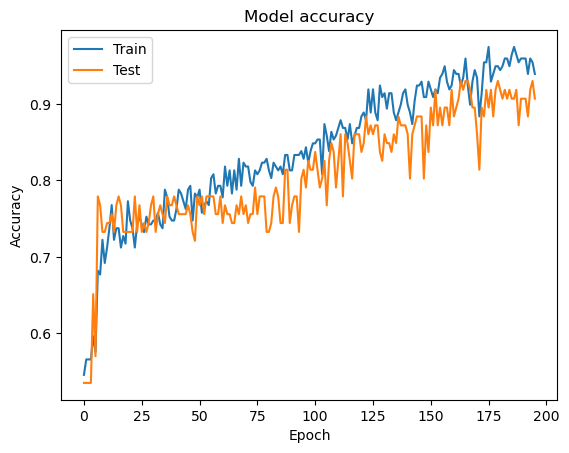

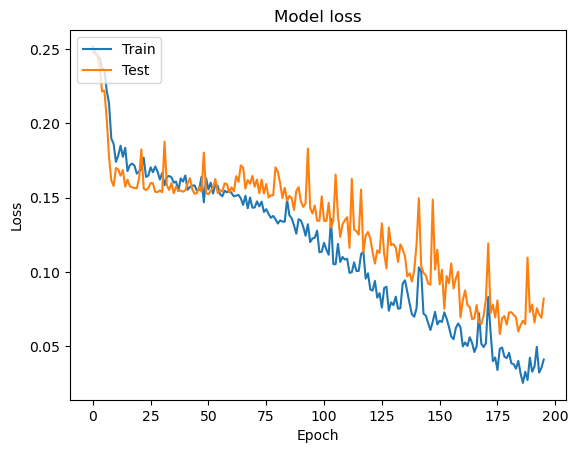

In [21]:
draw_result(history)

In [14]:
 
 
model4 = Sequential()
model4.add(LSTM(64, return_sequences=True,activation = 'sigmoid', name='LSTM0',input_shape=(8, 24)))
model4.add(LSTM(32, return_sequences=True, name='LSTM1'))
model4.add(LSTM(16, return_sequences=True, name='LSTM2'))
model4.add(Flatten())
model4.add(Dense(8))

model4.add(Dense(1,activation = 'sigmoid'))
 
model4.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
 
 
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='binary_crossentropy', patience=10, mode='auto',)
# mode=auto loss면 최저값이10번정도 반복되면 정지, acc면 최고값이 10번정도 반복되면 정지
# mode=min, mode=max
# history = model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=2, callbacks=[early_stopping])

history = model4.fit(x_train, y_train, epochs=300, batch_size=4, verbose=1,validation_split=0.3)


Epoch 1/300
33/33 [==============================] - 3s 21ms/step - loss: 0.2284 - accuracy: 0.6412 - val_loss: 0.2114 - val_accuracy: 0.7018
Epoch 2/300
33/33 [==============================] - 0s 7ms/step - loss: 0.2234 - accuracy: 0.6718 - val_loss: 0.2096 - val_accuracy: 0.7018
Epoch 3/300
33/33 [==============================] - 0s 6ms/step - loss: 0.2244 - accuracy: 0.6718 - val_loss: 0.2116 - val_accuracy: 0.7018
Epoch 4/300
33/33 [==============================] - 0s 6ms/step - loss: 0.2220 - accuracy: 0.6718 - val_loss: 0.2107 - val_accuracy: 0.7018
Epoch 5/300
33/33 [==============================] - 0s 7ms/step - loss: 0.2216 - accuracy: 0.6718 - val_loss: 0.2096 - val_accuracy: 0.7018
Epoch 6/300
33/33 [==============================] - 0s 7ms/step - loss: 0.2223 - accuracy: 0.6718 - val_loss: 0.2093 - val_accuracy: 0.7018
Epoch 7/300
33/33 [==============================] - 0s 6ms/step - loss: 0.2235 - accuracy: 0.6718 - val_loss: 0.2111 - val_accuracy: 0.7018
Epoch 8/300


Epoch 59/300
33/33 [==============================] - 0s 6ms/step - loss: 0.1756 - accuracy: 0.6947 - val_loss: 0.1819 - val_accuracy: 0.8246
Epoch 60/300
33/33 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.7176 - val_loss: 0.1866 - val_accuracy: 0.8246
Epoch 61/300
33/33 [==============================] - 0s 6ms/step - loss: 0.1917 - accuracy: 0.6794 - val_loss: 0.2109 - val_accuracy: 0.6667
Epoch 62/300
33/33 [==============================] - 0s 6ms/step - loss: 0.1934 - accuracy: 0.6718 - val_loss: 0.1725 - val_accuracy: 0.7018
Epoch 63/300
33/33 [==============================] - 0s 6ms/step - loss: 0.1635 - accuracy: 0.7252 - val_loss: 0.1869 - val_accuracy: 0.6316
Epoch 64/300
33/33 [==============================] - 0s 6ms/step - loss: 0.1575 - accuracy: 0.8015 - val_loss: 0.1755 - val_accuracy: 0.6842
Epoch 65/300
33/33 [==============================] - 0s 7ms/step - loss: 0.1444 - accuracy: 0.7634 - val_loss: 0.1702 - val_accuracy: 0.7895
Epoch 

33/33 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9771 - val_loss: 0.0824 - val_accuracy: 0.8772
Epoch 174/300
33/33 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.9389 - val_loss: 0.0896 - val_accuracy: 0.9298
Epoch 175/300
33/33 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.9695 - val_loss: 0.1434 - val_accuracy: 0.8421
Epoch 176/300
33/33 [==============================] - 0s 6ms/step - loss: 0.0421 - accuracy: 0.9389 - val_loss: 0.0901 - val_accuracy: 0.8596
Epoch 177/300
33/33 [==============================] - 0s 6ms/step - loss: 0.0213 - accuracy: 0.9771 - val_loss: 0.1214 - val_accuracy: 0.8421
Epoch 178/300
33/33 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9695 - val_loss: 0.0958 - val_accuracy: 0.8772
Epoch 179/300
33/33 [==============================] - 0s 6ms/step - loss: 0.0186 - accuracy: 0.9847 - val_loss: 0.1015 - val_accuracy: 0.8596
Epoch 180/300

33/33 [==============================] - 0s 12ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1070 - val_accuracy: 0.8772
Epoch 288/300
33/33 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1095 - val_accuracy: 0.8596
Epoch 289/300
33/33 [==============================] - 0s 9ms/step - loss: 9.2474e-04 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 0.8596
Epoch 290/300
33/33 [==============================] - 0s 7ms/step - loss: 9.4189e-04 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.8596
Epoch 291/300
33/33 [==============================] - 0s 6ms/step - loss: 7.3592e-04 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.8421
Epoch 292/300
33/33 [==============================] - 0s 6ms/step - loss: 6.6255e-04 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 0.8421
Epoch 293/300
33/33 [==============================] - 0s 6ms/step - loss: 4.0036e-04 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy

In [15]:
results = model4.evaluate(x_test, y_test, batch_size=10)
print("test loss, test acc:", results)

5/5 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.8750
test loss, test acc: [0.11665121465921402, 0.875]


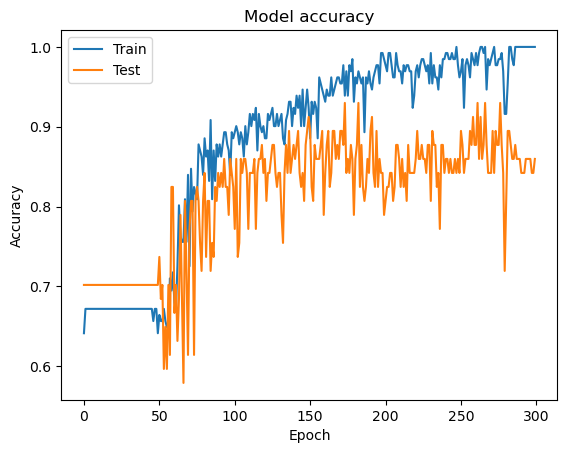

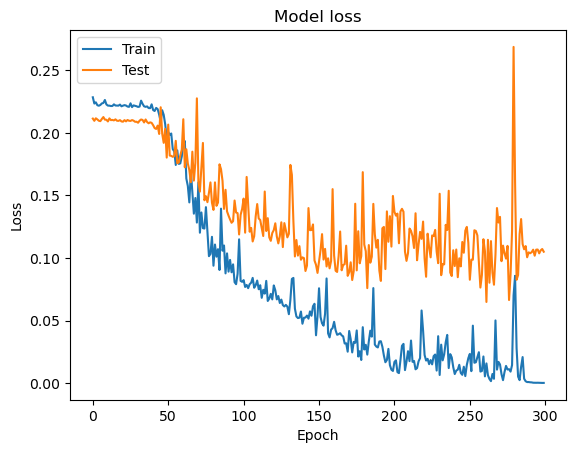

In [16]:
draw_result(history)

In [42]:
model10.save('model10')

INFO:tensorflow:Assets written to: model10\assets


INFO:tensorflow:Assets written to: model10\assets


In [1]:
def draw_result(history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [37]:
 
 
model10 = Sequential()
model10.add(LSTM(64, return_sequences=True,activation = 'sigmoid', name='LSTM0',input_shape=(8, 24)))
model10.add(LSTM(32, return_sequences=True, name='LSTM1'))
model10.add(LSTM(16, return_sequences=True, name='LSTM2'))
model10.add(Flatten())
model10.add(Dense(8))

model10.add(Dense(1,activation = 'sigmoid'))
 
model10.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
 
 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=30, mode='auto',)
# mode=auto loss면 최저값이10번정도 반복되면 정지, acc면 최고값이 10번정도 반복되면 정지
# mode=min, mode=max
# history = model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=2, callbacks=[early_stopping])

history = model10.fit(x_train, y_train, epochs=500, batch_size=4, verbose=1,validation_split=0.3, callbacks=[early_stopping])


Epoch 1/500
33/33 [==============================] - 4s 32ms/step - loss: 0.2292 - accuracy: 0.6718 - val_loss: 0.2094 - val_accuracy: 0.7018
Epoch 2/500
33/33 [==============================] - 0s 8ms/step - loss: 0.2239 - accuracy: 0.6718 - val_loss: 0.2093 - val_accuracy: 0.7018
Epoch 3/500
33/33 [==============================] - 0s 8ms/step - loss: 0.2228 - accuracy: 0.6718 - val_loss: 0.2095 - val_accuracy: 0.7018
Epoch 4/500
33/33 [==============================] - 0s 8ms/step - loss: 0.2222 - accuracy: 0.6718 - val_loss: 0.2096 - val_accuracy: 0.7018
Epoch 5/500
33/33 [==============================] - 0s 9ms/step - loss: 0.2223 - accuracy: 0.6718 - val_loss: 0.2122 - val_accuracy: 0.7018
Epoch 6/500
33/33 [==============================] - 0s 9ms/step - loss: 0.2227 - accuracy: 0.6718 - val_loss: 0.2111 - val_accuracy: 0.7018
Epoch 7/500
33/33 [==============================] - 0s 8ms/step - loss: 0.2227 - accuracy: 0.6718 - val_loss: 0.2095 - val_accuracy: 0.7018
Epoch 8/500


Epoch 59/500
33/33 [==============================] - 0s 8ms/step - loss: 0.1551 - accuracy: 0.7481 - val_loss: 0.1954 - val_accuracy: 0.6491
Epoch 60/500
33/33 [==============================] - 0s 8ms/step - loss: 0.1399 - accuracy: 0.8092 - val_loss: 0.2019 - val_accuracy: 0.5965
Epoch 61/500
33/33 [==============================] - 0s 8ms/step - loss: 0.1523 - accuracy: 0.7710 - val_loss: 0.1836 - val_accuracy: 0.6140
Epoch 62/500
33/33 [==============================] - 0s 8ms/step - loss: 0.1503 - accuracy: 0.7634 - val_loss: 0.2187 - val_accuracy: 0.5965
Epoch 63/500
33/33 [==============================] - 0s 8ms/step - loss: 0.1155 - accuracy: 0.8244 - val_loss: 0.1374 - val_accuracy: 0.8772
Epoch 64/500
33/33 [==============================] - 0s 8ms/step - loss: 0.1132 - accuracy: 0.8626 - val_loss: 0.1397 - val_accuracy: 0.8421
Epoch 65/500
33/33 [==============================] - 0s 8ms/step - loss: 0.1148 - accuracy: 0.8626 - val_loss: 0.1595 - val_accuracy: 0.7368
Epoch 

33/33 [==============================] - 0s 8ms/step - loss: 0.0597 - accuracy: 0.9084 - val_loss: 0.0911 - val_accuracy: 0.8596
Epoch 117/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0496 - accuracy: 0.9313 - val_loss: 0.1168 - val_accuracy: 0.8246
Epoch 118/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0531 - accuracy: 0.9084 - val_loss: 0.1087 - val_accuracy: 0.8421
Epoch 119/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0551 - accuracy: 0.9313 - val_loss: 0.1055 - val_accuracy: 0.8596
Epoch 120/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0496 - accuracy: 0.9160 - val_loss: 0.1216 - val_accuracy: 0.8421
Epoch 121/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0712 - accuracy: 0.8855 - val_loss: 0.0928 - val_accuracy: 0.8947
Epoch 122/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0544 - accuracy: 0.9160 - val_loss: 0.0938 - val_accuracy: 0.8596
Epoch 123/500

33/33 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.9618 - val_loss: 0.1277 - val_accuracy: 0.8246
Epoch 174/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0831 - accuracy: 0.8702 - val_loss: 0.2065 - val_accuracy: 0.7368
Epoch 175/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0463 - accuracy: 0.9313 - val_loss: 0.1289 - val_accuracy: 0.8246
Epoch 176/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0223 - accuracy: 0.9618 - val_loss: 0.1115 - val_accuracy: 0.8596
Epoch 177/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0189 - accuracy: 0.9847 - val_loss: 0.1271 - val_accuracy: 0.8246
Epoch 178/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0265 - accuracy: 0.9618 - val_loss: 0.1480 - val_accuracy: 0.8246
Epoch 179/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0145 - accuracy: 0.9847 - val_loss: 0.1595 - val_accuracy: 0.7895
Epoch 180/50

In [38]:
results = model10.evaluate(x_test, y_test, batch_size=10)
print("test loss, test acc:", results)

5/5 [==============================] - 0s 5ms/step - loss: 0.1583 - accuracy: 0.8333
test loss, test acc: [0.15834401547908783, 0.8333333134651184]


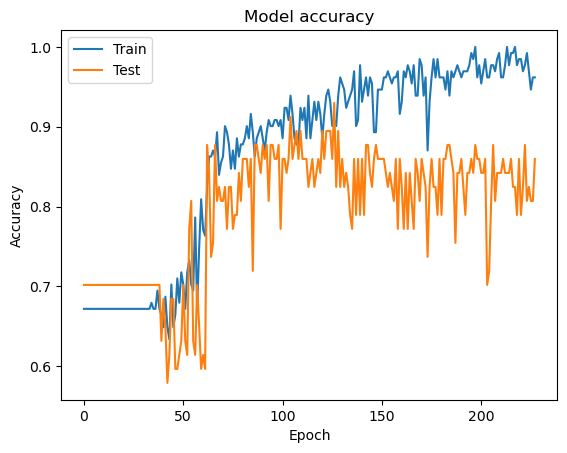

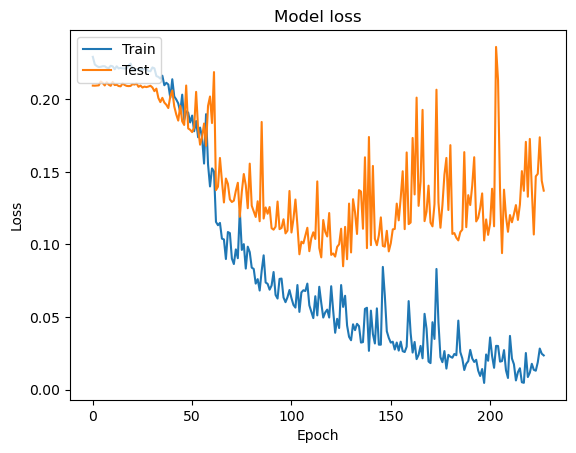

In [39]:
draw_result(history)

# 위에가 6월 19일 오후작성

In [23]:
 
 
model10 = Sequential()
model10.add(LSTM(64, return_sequences=True,activation = 'sigmoid', name='LSTM0',input_shape=(8, 24)))
model10.add(LSTM(32, return_sequences=True, name='LSTM1'))
model10.add(LSTM(16, return_sequences=True, name='LSTM2'))
model10.add(Flatten())
model10.add(Dense(8))

model10.add(Dense(1,activation = 'sigmoid'))
 
model10.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
 
 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=20, mode='auto',)
# mode=auto loss면 최저값이10번정도 반복되면 정지, acc면 최고값이 10번정도 반복되면 정지
# mode=min, mode=max
# history = model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=2, callbacks=[early_stopping])

history = model10.fit(x_train, y_train, epochs=500, batch_size=4, verbose=1,validation_split=0.3, callbacks=[early_stopping])


Epoch 1/500
33/33 [==============================] - 4s 34ms/step - loss: 0.2298 - accuracy: 0.6718 - val_loss: 0.2120 - val_accuracy: 0.7018
Epoch 2/500
33/33 [==============================] - 0s 8ms/step - loss: 0.2259 - accuracy: 0.6718 - val_loss: 0.2106 - val_accuracy: 0.7018
Epoch 3/500
33/33 [==============================] - 1s 20ms/step - loss: 0.2243 - accuracy: 0.6718 - val_loss: 0.2119 - val_accuracy: 0.7018
Epoch 4/500
33/33 [==============================] - 0s 8ms/step - loss: 0.2242 - accuracy: 0.6718 - val_loss: 0.2091 - val_accuracy: 0.7018
Epoch 5/500
33/33 [==============================] - 0s 8ms/step - loss: 0.2222 - accuracy: 0.6718 - val_loss: 0.2117 - val_accuracy: 0.7018
Epoch 6/500
33/33 [==============================] - 0s 9ms/step - loss: 0.2226 - accuracy: 0.6718 - val_loss: 0.2098 - val_accuracy: 0.7018
Epoch 7/500
33/33 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.6718 - val_loss: 0.2093 - val_accuracy: 0.7018
Epoch 8/500

In [24]:
results = model10.evaluate(x_test, y_test, batch_size=10)
print("test loss, test acc:", results)

5/5 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.6667
test loss, test acc: [0.22149331867694855, 0.6666666865348816]


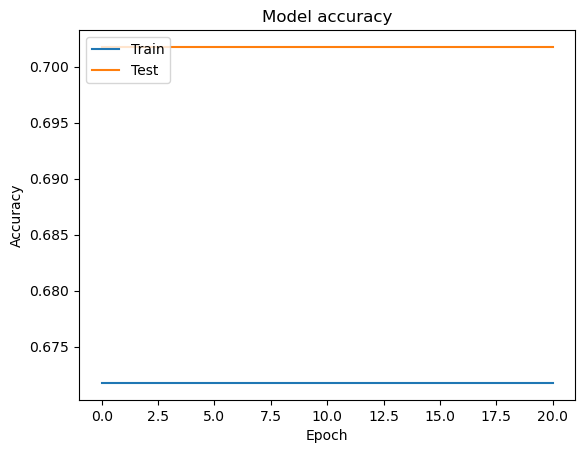

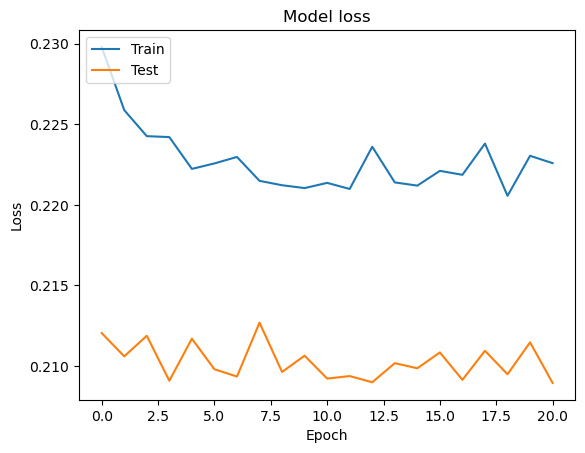

In [26]:
draw_result(history)